## Logistic Regression

In [64]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_auc_score
import numpy as np
from sklearn.preprocessing import MaxAbsScaler
from scipy.sparse import csr_matrix, vstack, hstack
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

### Data Prep for ML

In [65]:
train = pd.read_pickle("data/train.pkl").dropna()
test = pd.read_pickle("data/test.pkl").dropna()

In [66]:
train_parent_tdidf_csr = vstack(train["parent_comment_tdidf"])
test_parent_tdidf_csr = vstack(test["parent_comment_tdidf"])

train_tdidf_csr = vstack(train["comment_tdidf"])
test_tdidf_csr = vstack(test["comment_tdidf"])

train_parent_bow_csr = vstack(train["parent_comment_bow"])
test_parent_bow_csr = vstack(test["parent_comment_bow"])

train_bow_csr = vstack(train["comment_bow"])
test_bow_csr = vstack(test["comment_bow"])

In [67]:
train.columns

Index(['comment', 'parent_comment', 'comment_tokens', 'parent_comment_tokens',
       'comment_tokens_bigram', 'parent_comment_tokens_bigram',
       'comment_tokens_trigram', 'parent_comment_tokens_trigram',
       'comment_score', 'parent_comment_score',
       'weighted_parent_sentiment_score_neutral',
       'weighted_parent_sentiment_score_positive',
       'weighted_comment_sentiment_score_neutral',
       'weighted_comment_sentiment_score_positive', 'comment_word_count',
       'parent_comment_word_count', 'comment_token_count',
       'parent_comment_token_count', 'comment_unique_word_count',
       'parent_comment_unique_word_count', 'comment_unique_token_count',
       'parent_comment_unique_token_count', 'comment_stopword_count',
       'parent_comment_stopword_count', 'comment_mean_word_length',
       'parent_comment_mean_word_length', 'comment_mean_token_length',
       'parent_comment_mean_token_length', 'comment_char_count',
       'parent_comment_char_count', 'comment_

In [68]:
list_of_features = [
       'comment_word_count','parent_comment_word_count',
       'comment_token_count', 'parent_comment_token_count',
       'comment_unique_word_count', 'parent_comment_unique_word_count',
       'comment_unique_token_count', 'parent_comment_unique_token_count',
       'comment_stopword_count', 'parent_comment_stopword_count',
       'comment_mean_word_length', 'parent_comment_mean_word_length',
       'comment_mean_token_length', 'parent_comment_mean_token_length',
       'comment_char_count', 'parent_comment_char_count',
       'comment_punctuation_count', 'parent_comment_punctuation_count',
       'comment_hashtag_count', 'parent_comment_hashtag_count',
       'comment_number_count', 'parent_comment_number_count',
       'weighted_parent_sentiment_score_neutral',
       'weighted_parent_sentiment_score_positive',
       'weighted_comment_sentiment_score_neutral',
       'weighted_comment_sentiment_score_positive']

In [69]:
bool_cols = ['weighted_parent_sentiment_score_neutral',
             'weighted_parent_sentiment_score_positive',
             'weighted_comment_sentiment_score_neutral',
             'weighted_comment_sentiment_score_positive']

for col in bool_cols: #need to convert bool type to integer
    train[col] = train[col].astype(int)
    test[col] = test[col].astype(int)

X_train_gen_features = csr_matrix(train[list_of_features])

#Scaling Non-BoW/TDidf Features
X_train_scaler = MaxAbsScaler()
X_train_gen_features = X_train_scaler.fit_transform(X_train_gen_features)

X_test_gen_features = csr_matrix(test[list_of_features])
X_test_gen_features = X_train_scaler.transform(X_test_gen_features)

y_train_LR = train['label']
y_test_LR = test['label']

### Baseline 1: General Features

In [70]:
#Data Specific Prep
X_train_LR = X_train_gen_features

In [71]:
k = 5

model = LogisticRegression(max_iter = 10000)
kf = KFold(n_splits=k, shuffle=True, random_state=42)

cross_val_scores = []
for train_index, val_index in kf.split(X_train_LR): 
    X_train, X_val = X_train_LR[train_index], X_train_LR[val_index]
    y_train, y_val = y_train_LR.iloc[train_index,], y_train_LR.iloc[val_index,]
    
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the validation data
    y_pred = model.predict(X_val)
    
    # Calculate roc_auc and store it in the list
    roc_auc = roc_auc_score(y_val, y_pred)
    cross_val_scores.append(roc_auc)

mean_roc_auc = sum(cross_val_scores) / k
std_roc_auc = np.std(cross_val_scores)

print(f"Mean roc_auc: {mean_roc_auc}")
print(f"Standard Deviation of roc_auc: {std_roc_auc}")

/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

Mean roc_auc: 0.5407845519807438
Standard Deviation of roc_auc: 0.0027162949884635477


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

In [72]:
coefficients = model.coef_[0]
feature_names = list_of_features  
feature_importance = sorted(zip(coefficients, feature_names), key=lambda x: abs(x[0]), reverse=True)

top_features = [feature for _, feature in feature_importance]
top_features

['comment_stopword_count',
 'comment_unique_word_count',
 'comment_punctuation_count',
 'comment_unique_token_count',
 'parent_comment_stopword_count',
 'parent_comment_unique_token_count',
 'comment_word_count',
 'parent_comment_punctuation_count',
 'parent_comment_word_count',
 'comment_token_count',
 'comment_number_count',
 'weighted_parent_sentiment_score_positive',
 'weighted_comment_sentiment_score_neutral',
 'weighted_parent_sentiment_score_neutral',
 'comment_mean_word_length',
 'parent_comment_char_count',
 'comment_char_count',
 'comment_mean_token_length',
 'comment_hashtag_count',
 'parent_comment_hashtag_count',
 'parent_comment_number_count',
 'parent_comment_mean_word_length',
 'parent_comment_token_count',
 'parent_comment_unique_word_count',
 'weighted_comment_sentiment_score_positive',
 'parent_comment_mean_token_length']

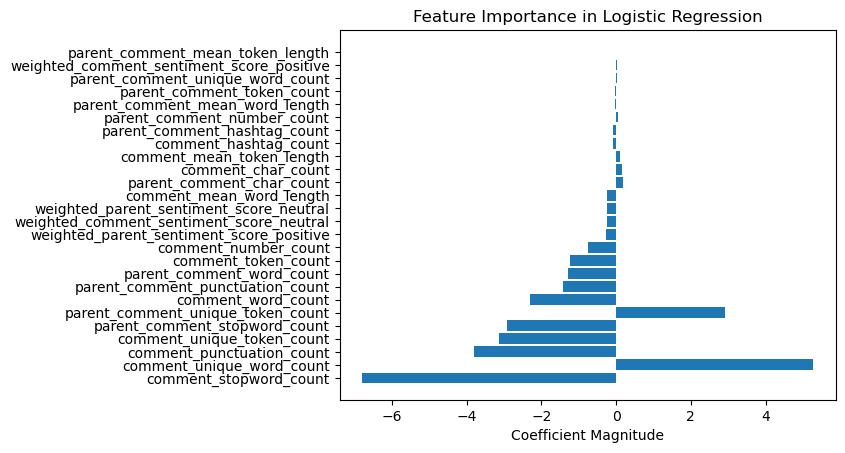

In [73]:
importance, features = zip(*feature_importance)
plt.barh(features, importance)
plt.xlabel('Coefficient Magnitude')
plt.title('Feature Importance in Logistic Regression')
plt.show()

### Baseline 2: Comment BoW

In [74]:
#Data Specific Prep
X_train_LR = train_bow_csr

In [75]:
k = 5

model = LogisticRegression(max_iter = 10000)
kf = KFold(n_splits=k, shuffle=True, random_state=42)

cross_val_scores = []
for train_index, val_index in kf.split(X_train_LR): 
    X_train, X_val = X_train_LR[train_index], X_train_LR[val_index]
    y_train, y_val = y_train_LR.iloc[train_index,], y_train_LR.iloc[val_index,]
    
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the validation data
    y_pred = model.predict(X_val)
    
    # Calculate roc_auc and store it in the list
    roc_auc = roc_auc_score(y_val, y_pred)
    cross_val_scores.append(roc_auc)

mean_roc_auc = sum(cross_val_scores) / k
std_roc_auc = np.std(cross_val_scores)

print(f"Mean roc_auc: {mean_roc_auc}") 
#unigram only: Mean roc_auc: 0.655919472075098
#unigram only: Standard Deviation of roc_auc: 0.0008334994867002629
print(f"Standard Deviation of roc_auc: {std_roc_auc}")

/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

Mean roc_auc: 0.6656133859189113
Standard Deviation of roc_auc: 0.0015030836330154377


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

In [76]:
coefficients = model.coef_[0]
feature_names = list_of_features  
feature_importance = sorted(zip(coefficients, feature_names), key=lambda x: abs(x[0]), reverse=True)

top_features = [feature for _, feature in feature_importance]
top_features

['comment_char_count',
 'comment_hashtag_count',
 'comment_mean_word_length',
 'comment_word_count',
 'parent_comment_unique_token_count',
 'comment_unique_word_count',
 'weighted_comment_sentiment_score_positive',
 'parent_comment_mean_word_length',
 'parent_comment_char_count',
 'parent_comment_hashtag_count',
 'weighted_parent_sentiment_score_neutral',
 'comment_punctuation_count',
 'parent_comment_unique_word_count',
 'parent_comment_number_count',
 'comment_number_count',
 'comment_unique_token_count',
 'parent_comment_stopword_count',
 'weighted_comment_sentiment_score_neutral',
 'weighted_parent_sentiment_score_positive',
 'parent_comment_word_count',
 'comment_stopword_count',
 'parent_comment_punctuation_count',
 'parent_comment_token_count',
 'parent_comment_mean_token_length',
 'comment_mean_token_length',
 'comment_token_count']

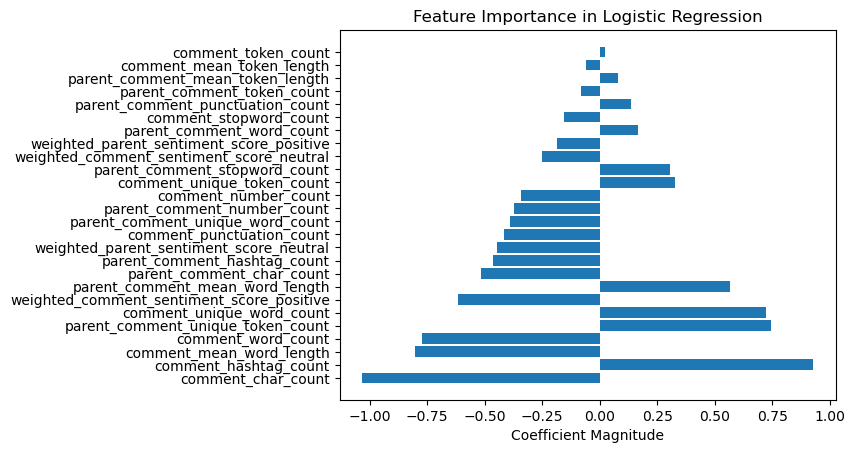

In [77]:
importance, features = zip(*feature_importance)
plt.barh(features, importance)
plt.xlabel('Coefficient Magnitude')
plt.title('Feature Importance in Logistic Regression')
plt.show()

### Baseline 3: Comment TD-IDF

In [78]:
#Data Specific Prep
X_train_LR = train_tdidf_csr

In [79]:
k = 5

model = LogisticRegression(max_iter = 100000)
kf = KFold(n_splits=k, shuffle=True, random_state=42)

cross_val_scores = []
for train_index, val_index in kf.split(X_train_LR): 
    X_train, X_val = X_train_LR[train_index], X_train_LR[val_index]
    y_train, y_val = y_train_LR.iloc[train_index,], y_train_LR.iloc[val_index,]
    
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the validation data
    y_pred = model.predict(X_val)
    
    # Calculate roc_auc and store it in the list
    roc_auc = roc_auc_score(y_val, y_pred)
    cross_val_scores.append(roc_auc)

mean_roc_auc = sum(cross_val_scores) / k
std_roc_auc = np.std(cross_val_scores)

print(f"Mean roc_auc: {mean_roc_auc}")
print(f"Standard Deviation of roc_auc: {std_roc_auc}")
#unigram only: Mean roc_auc: 0.6592838234414328
#unigram only: Standard Deviation of roc_auc: 0.0009248592313210024

/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

Mean roc_auc: 0.6716093082315825
Standard Deviation of roc_auc: 0.002931281932627621


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

In [80]:
coefficients = model.coef_[0]
feature_names = list_of_features  
feature_importance = sorted(zip(coefficients, feature_names), key=lambda x: abs(x[0]), reverse=True)

top_features = [feature for _, feature in feature_importance]
top_features

['comment_word_count',
 'parent_comment_unique_token_count',
 'comment_char_count',
 'comment_mean_word_length',
 'comment_hashtag_count',
 'parent_comment_number_count',
 'parent_comment_mean_word_length',
 'parent_comment_word_count',
 'parent_comment_char_count',
 'comment_unique_word_count',
 'parent_comment_hashtag_count',
 'weighted_parent_sentiment_score_neutral',
 'comment_number_count',
 'comment_unique_token_count',
 'parent_comment_stopword_count',
 'comment_stopword_count',
 'parent_comment_punctuation_count',
 'weighted_comment_sentiment_score_positive',
 'comment_mean_token_length',
 'parent_comment_unique_word_count',
 'weighted_parent_sentiment_score_positive',
 'comment_punctuation_count',
 'comment_token_count',
 'parent_comment_token_count',
 'weighted_comment_sentiment_score_neutral',
 'parent_comment_mean_token_length']

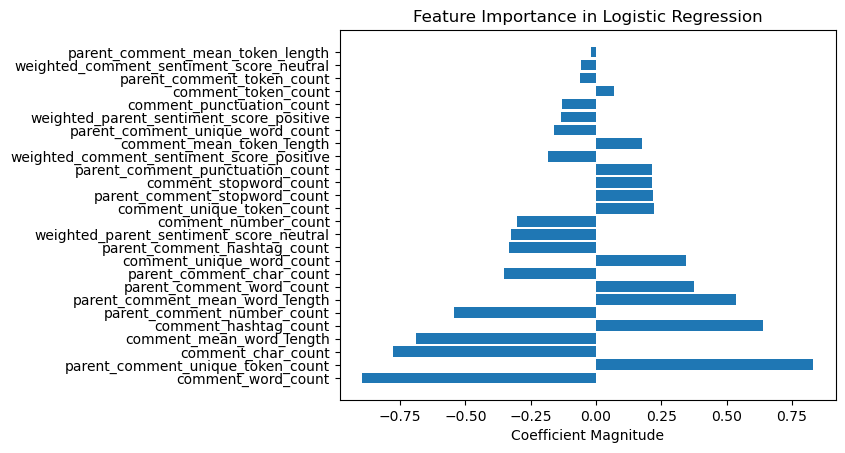

In [81]:
importance, features = zip(*feature_importance)
plt.barh(features, importance)
plt.xlabel('Coefficient Magnitude')
plt.title('Feature Importance in Logistic Regression')
plt.show()

### Baseline 4: General Features + BoW

In [82]:
X_train_LR = hstack([X_train_gen_features,train_bow_csr])

In [83]:
k = 5

model = LogisticRegression(max_iter = 100000)
kf = KFold(n_splits=k, shuffle=True, random_state=42)

cross_val_scores = []
for train_index, val_index in kf.split(X_train_LR): 
    X_train, X_val = X_train_LR[train_index], X_train_LR[val_index]
    y_train, y_val = y_train_LR.iloc[train_index,], y_train_LR.iloc[val_index,]
    
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the validation data
    y_pred = model.predict(X_val)
    
    # Calculate roc_auc and store it in the list
    roc_auc = roc_auc_score(y_val, y_pred)
    cross_val_scores.append(roc_auc)

mean_roc_auc = sum(cross_val_scores) / k
std_roc_auc = np.std(cross_val_scores)

print(f"Mean roc_auc: {mean_roc_auc}")
print(f"Standard Deviation of roc_auc: {std_roc_auc}")
#unigram: Mean roc_auc: 0.6578548281567246
#unigram: Standard Deviation of roc_auc: 0.0015689875036237729

/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

Mean roc_auc: 0.6679022517248872
Standard Deviation of roc_auc: 0.0011954103763827497


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

In [84]:
coefficients = model.coef_[0]
feature_names = list_of_features  
feature_importance = sorted(zip(coefficients, feature_names), key=lambda x: abs(x[0]), reverse=True)

top_features = [feature for _, feature in feature_importance]
top_features

['comment_unique_token_count',
 'comment_unique_word_count',
 'comment_punctuation_count',
 'comment_stopword_count',
 'parent_comment_unique_token_count',
 'parent_comment_stopword_count',
 'comment_token_count',
 'comment_word_count',
 'parent_comment_word_count',
 'parent_comment_punctuation_count',
 'parent_comment_number_count',
 'comment_mean_word_length',
 'comment_char_count',
 'weighted_parent_sentiment_score_positive',
 'weighted_parent_sentiment_score_neutral',
 'parent_comment_unique_word_count',
 'weighted_comment_sentiment_score_neutral',
 'parent_comment_token_count',
 'comment_number_count',
 'parent_comment_char_count',
 'parent_comment_mean_token_length',
 'weighted_comment_sentiment_score_positive',
 'parent_comment_mean_word_length',
 'parent_comment_hashtag_count',
 'comment_hashtag_count',
 'comment_mean_token_length']

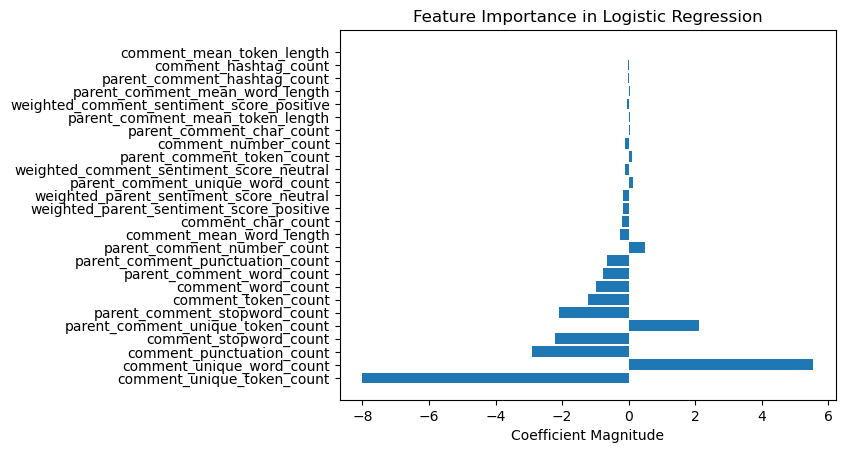

In [85]:
importance, features = zip(*feature_importance)
plt.barh(features, importance)
plt.xlabel('Coefficient Magnitude')
plt.title('Feature Importance in Logistic Regression')
plt.show()

### Baseline 5: General Features + TD-IDF

In [86]:
X_train_LR = hstack([X_train_gen_features,train_tdidf_csr])

In [87]:
k = 5

model = LogisticRegression(max_iter = 100000)
kf = KFold(n_splits=k, shuffle=True, random_state=42)

cross_val_scores = []
for train_index, val_index in kf.split(X_train_LR): 
    X_train, X_val = X_train_LR[train_index], X_train_LR[val_index]
    y_train, y_val = y_train_LR.iloc[train_index,], y_train_LR.iloc[val_index,]
    
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the validation data
    y_pred = model.predict(X_val)
    
    # Calculate roc_auc and store it in the list
    roc_auc = roc_auc_score(y_val, y_pred)
    cross_val_scores.append(roc_auc)

mean_roc_auc = sum(cross_val_scores) / k
std_roc_auc = np.std(cross_val_scores)

print(f"Mean roc_auc: {mean_roc_auc}")
print(f"Standard Deviation of roc_auc: {std_roc_auc}")
#unigram: Mean roc_auc: 0.6623742530514969
#unigram: Standard Deviation of roc_auc: 0.0010939794906847484

/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

Mean roc_auc: 0.6735261795134129
Standard Deviation of roc_auc: 0.0026255516563927286


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

In [88]:
coefficients = model.coef_[0]
feature_names = list_of_features  
feature_importance = sorted(zip(coefficients, feature_names), key=lambda x: abs(x[0]), reverse=True)

top_features = [feature for _, feature in feature_importance]
top_features

['comment_unique_word_count',
 'comment_stopword_count',
 'comment_unique_token_count',
 'comment_punctuation_count',
 'parent_comment_stopword_count',
 'parent_comment_unique_token_count',
 'comment_word_count',
 'comment_token_count',
 'parent_comment_word_count',
 'parent_comment_punctuation_count',
 'comment_char_count',
 'parent_comment_number_count',
 'comment_number_count',
 'parent_comment_unique_word_count',
 'parent_comment_token_count',
 'comment_mean_word_length',
 'weighted_parent_sentiment_score_positive',
 'weighted_parent_sentiment_score_neutral',
 'weighted_comment_sentiment_score_neutral',
 'weighted_comment_sentiment_score_positive',
 'parent_comment_mean_word_length',
 'parent_comment_char_count',
 'parent_comment_mean_token_length',
 'comment_mean_token_length',
 'comment_hashtag_count',
 'parent_comment_hashtag_count']

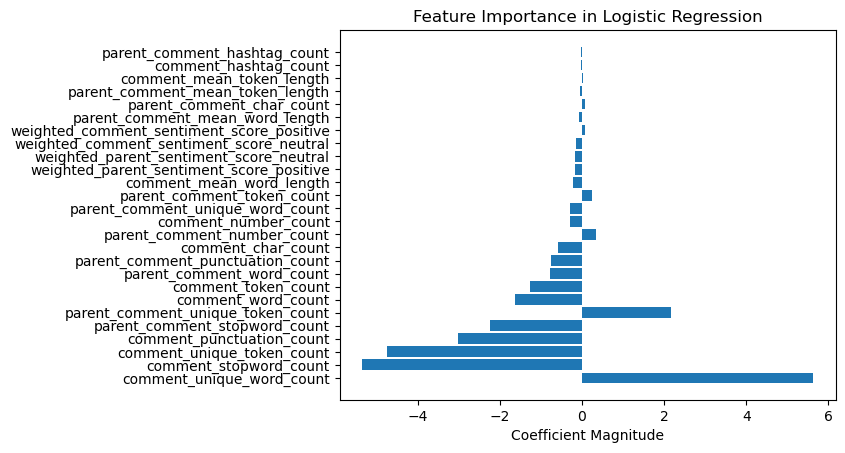

In [89]:
importance, features = zip(*feature_importance)
plt.barh(features, importance)
plt.xlabel('Coefficient Magnitude')
plt.title('Feature Importance in Logistic Regression')
plt.show()

### Baseline 6: Gen Features + Comment TDIDF + Parent TDIDF

In [90]:
X_train_LR = hstack([X_train_gen_features,train_tdidf_csr,train_parent_tdidf_csr])

In [91]:
k = 5

model = LogisticRegression(max_iter = 100000)
kf = KFold(n_splits=k, shuffle=True, random_state=42)

cross_val_scores = []
for train_index, val_index in kf.split(X_train_LR): 
    X_train, X_val = X_train_LR[train_index], X_train_LR[val_index]
    y_train, y_val = y_train_LR.iloc[train_index,], y_train_LR.iloc[val_index,]
    
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the validation data
    y_pred = model.predict(X_val)
    
    # Calculate roc_auc and store it in the list
    roc_auc = roc_auc_score(y_val, y_pred)
    cross_val_scores.append(roc_auc)

mean_roc_auc = sum(cross_val_scores) / k
std_roc_auc = np.std(cross_val_scores)

print(f"Mean roc_auc: {mean_roc_auc}")
print(f"Standard Deviation of roc_auc: {std_roc_auc}")
#unigram: Mean roc_auc: 0.6595766552618814
#unigram: Standard Deviation of roc_auc: 0.0020504330756799696

/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

Mean roc_auc: 0.6689292575200633
Standard Deviation of roc_auc: 0.002300049602430471


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

In [92]:
coefficients = model.coef_[0]
feature_names = list_of_features  
feature_importance = sorted(zip(coefficients, feature_names), key=lambda x: abs(x[0]), reverse=True)

top_features = [feature for _, feature in feature_importance]
top_features

['comment_unique_word_count',
 'comment_stopword_count',
 'comment_unique_token_count',
 'comment_punctuation_count',
 'comment_word_count',
 'parent_comment_stopword_count',
 'comment_token_count',
 'parent_comment_unique_word_count',
 'parent_comment_unique_token_count',
 'comment_char_count',
 'parent_comment_word_count',
 'comment_number_count',
 'parent_comment_number_count',
 'parent_comment_token_count',
 'comment_mean_word_length',
 'weighted_comment_sentiment_score_neutral',
 'parent_comment_char_count',
 'weighted_parent_sentiment_score_neutral',
 'weighted_parent_sentiment_score_positive',
 'weighted_comment_sentiment_score_positive',
 'parent_comment_mean_word_length',
 'parent_comment_mean_token_length',
 'parent_comment_punctuation_count',
 'comment_mean_token_length',
 'comment_hashtag_count',
 'parent_comment_hashtag_count']

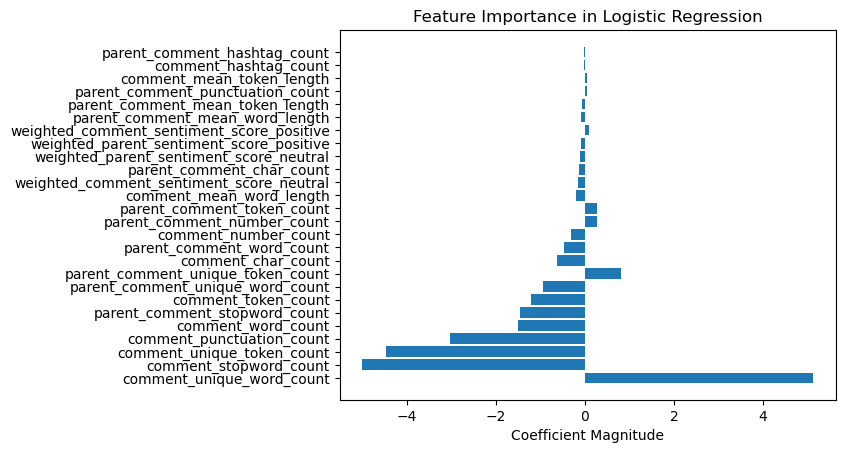

In [93]:
importance, features = zip(*feature_importance)
plt.barh(features, importance)
plt.xlabel('Coefficient Magnitude')
plt.title('Feature Importance in Logistic Regression')
plt.show()

### Baseline 7: Gen + Parent TDIDF

In [94]:
X_train_LR = hstack([X_train_gen_features,train_parent_tdidf_csr])

In [95]:
k = 5

model = LogisticRegression(max_iter = 100000)
kf = KFold(n_splits=k, shuffle=True, random_state=42)

cross_val_scores = []
for train_index, val_index in kf.split(X_train_LR): 
    X_train, X_val = X_train_LR[train_index], X_train_LR[val_index]
    y_train, y_val = y_train_LR.iloc[train_index,], y_train_LR.iloc[val_index,]
    
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the validation data
    y_pred = model.predict(X_val)
    
    # Calculate roc_auc and store it in the list
    roc_auc = roc_auc_score(y_val, y_pred)
    cross_val_scores.append(roc_auc)

mean_roc_auc = sum(cross_val_scores) / k
std_roc_auc = np.std(cross_val_scores)

print(f"Mean roc_auc: {mean_roc_auc}")
print(f"Standard Deviation of roc_auc: {std_roc_auc}")
#unigram: Mean roc_auc: 0.570165520029702
#unigram: Standard Deviation of roc_auc: 0.002821502726381473

/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

Mean roc_auc: 0.5676056940809977
Standard Deviation of roc_auc: 0.003197361150975008


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

In [96]:
coefficients = model.coef_[0]
feature_names = list_of_features  
feature_importance = sorted(zip(coefficients, feature_names), key=lambda x: abs(x[0]), reverse=True)

top_features = [feature for _, feature in feature_importance]
top_features

['comment_stopword_count',
 'comment_unique_word_count',
 'comment_punctuation_count',
 'comment_unique_token_count',
 'comment_word_count',
 'parent_comment_stopword_count',
 'parent_comment_unique_word_count',
 'comment_token_count',
 'parent_comment_unique_token_count',
 'parent_comment_word_count',
 'comment_number_count',
 'comment_char_count',
 'parent_comment_number_count',
 'parent_comment_token_count',
 'comment_mean_word_length',
 'weighted_comment_sentiment_score_neutral',
 'parent_comment_char_count',
 'weighted_parent_sentiment_score_neutral',
 'weighted_parent_sentiment_score_positive',
 'parent_comment_mean_word_length',
 'parent_comment_mean_token_length',
 'parent_comment_punctuation_count',
 'comment_mean_token_length',
 'comment_hashtag_count',
 'weighted_comment_sentiment_score_positive',
 'parent_comment_hashtag_count']

In [ ]:
importance, features = zip(*feature_importance)
plt.barh(features, importance)
plt.xlabel('Coefficient Magnitude')
plt.title('Feature Importance in Logistic Regression')
plt.show()

### Hyper Parameter Tuning with Grid Search CV

In [21]:
### Using gen features and tdidf
X_train_LR = hstack([X_train_gen_features,train_tdidf_csr])

In [22]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs'],
}

In [23]:
grid_search = GridSearchCV(LogisticRegression(max_iter=100000), param_grid, cv=5, scoring='roc_auc', verbose=4)
grid_search.fit(X_train_LR, y_train_LR)

/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 1/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.529 total time=   0.1s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 2/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.530 total time=   0.1s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 3/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.528 total time=   0.1s
[CV 4/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.530 total time=   0.1s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 5/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.533 total time=   0.1s
[CV 1/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 1/5] END C=0.001, penalty=l2, solver=liblinear;, score=0.593 total time=   0.2s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 2/5] END C=0.001, penalty=l2, solver=liblinear;, score=0.595 total time=   0.2s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 3/5] END C=0.001, penalty=l2, solver=liblinear;, score=0.594 total time=   0.2s
[CV 4/5] END C=0.001, penalty=l2, solver=liblinear;, score=0.591 total time=   0.2s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 5/5] END C=0.001, penalty=l2, solver=liblinear;, score=0.601 total time=   0.2s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 1/5] END .C=0.001, penalty=l2, solver=lbfgs;, score=0.598 total time=   0.3s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 2/5] END .C=0.001, penalty=l2, solver=lbfgs;, score=0.600 total time=   0.3s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 3/5] END .C=0.001, penalty=l2, solver=lbfgs;, score=0.600 total time=   0.3s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 4/5] END .C=0.001, penalty=l2, solver=lbfgs;, score=0.597 total time=   0.3s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 5/5] END .C=0.001, penalty=l2, solver=lbfgs;, score=0.607 total time=   0.4s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 1/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.580 total time=   0.3s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 2/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.580 total time=   0.3s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 3/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.577 total time=   0.3s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 4/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.580 total time=   0.3s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 5/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.583 total time=   0.3s
[CV 1/5] END ....C=0.01, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ....C=0.01, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ....C=0.01, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ....C=0.01, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ....C=0.01, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 1/5] END C=0.01, penalty=l2, solver=liblinear;, score=0.662 total time=   0.3s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 2/5] END C=0.01, penalty=l2, solver=liblinear;, score=0.660 total time=   0.3s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 3/5] END C=0.01, penalty=l2, solver=liblinear;, score=0.659 total time=   0.3s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 4/5] END C=0.01, penalty=l2, solver=liblinear;, score=0.658 total time=   0.3s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 5/5] END C=0.01, penalty=l2, solver=liblinear;, score=0.660 total time=   0.3s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 1/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.662 total time=   0.8s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 2/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.659 total time=   0.7s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 3/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.658 total time=   0.8s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 4/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.658 total time=   0.8s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 5/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.659 total time=   0.7s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 1/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.684 total time=   0.4s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 2/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.685 total time=   0.4s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 3/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.680 total time=   0.4s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 4/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.679 total time=   0.4s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 5/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.682 total time=   0.4s
[CV 1/5] END .....C=0.1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END .....C=0.1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END .....C=0.1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END .....C=0.1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END .....C=0.1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 1/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.725 total time=   0.5s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 2/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.721 total time=   0.5s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 3/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.719 total time=   0.5s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 4/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.720 total time=   0.5s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 5/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.720 total time=   0.6s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 1/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.725 total time=   2.3s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 2/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.721 total time=   2.3s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 3/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.719 total time=   2.7s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 4/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.720 total time=   2.7s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 5/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.720 total time=   2.7s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 1/5] END .C=1, penalty=l1, solver=liblinear;, score=0.736 total time=   5.5s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 2/5] END .C=1, penalty=l1, solver=liblinear;, score=0.733 total time=   5.1s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 3/5] END .C=1, penalty=l1, solver=liblinear;, score=0.730 total time=   5.3s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 4/5] END .C=1, penalty=l1, solver=liblinear;, score=0.733 total time=   5.3s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 5/5] END .C=1, penalty=l1, solver=liblinear;, score=0.732 total time=   5.1s
[CV 1/5] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 1/5] END .C=1, penalty=l2, solver=liblinear;, score=0.740 total time=   1.1s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 2/5] END .C=1, penalty=l2, solver=liblinear;, score=0.735 total time=   1.0s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 3/5] END .C=1, penalty=l2, solver=liblinear;, score=0.734 total time=   1.0s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 4/5] END .C=1, penalty=l2, solver=liblinear;, score=0.736 total time=   1.1s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 5/5] END .C=1, penalty=l2, solver=liblinear;, score=0.736 total time=   1.0s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 1/5] END .....C=1, penalty=l2, solver=lbfgs;, score=0.740 total time=   8.2s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 2/5] END .....C=1, penalty=l2, solver=lbfgs;, score=0.735 total time=   8.7s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 3/5] END .....C=1, penalty=l2, solver=lbfgs;, score=0.734 total time=   7.9s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 4/5] END .....C=1, penalty=l2, solver=lbfgs;, score=0.736 total time=   7.6s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 5/5] END .....C=1, penalty=l2, solver=lbfgs;, score=0.736 total time=   8.4s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 1/5] END C=10, penalty=l1, solver=liblinear;, score=0.697 total time=  23.9s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 2/5] END C=10, penalty=l1, solver=liblinear;, score=0.689 total time=  25.2s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 3/5] END C=10, penalty=l1, solver=liblinear;, score=0.689 total time=  22.7s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 4/5] END C=10, penalty=l1, solver=liblinear;, score=0.695 total time=  18.7s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 5/5] END C=10, penalty=l1, solver=liblinear;, score=0.693 total time=  24.2s
[CV 1/5] END ......C=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ......C=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ......C=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ......C=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ......C=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 1/5] END C=10, penalty=l2, solver=liblinear;, score=0.718 total time=   2.0s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 2/5] END C=10, penalty=l2, solver=liblinear;, score=0.712 total time=   2.4s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 3/5] END C=10, penalty=l2, solver=liblinear;, score=0.712 total time=   2.1s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 4/5] END C=10, penalty=l2, solver=liblinear;, score=0.716 total time=   2.1s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 5/5] END C=10, penalty=l2, solver=liblinear;, score=0.715 total time=   2.2s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 1/5] END ....C=10, penalty=l2, solver=lbfgs;, score=0.718 total time=  17.8s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 2/5] END ....C=10, penalty=l2, solver=lbfgs;, score=0.712 total time=  21.1s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 3/5] END ....C=10, penalty=l2, solver=lbfgs;, score=0.712 total time=  20.5s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 4/5] END ....C=10, penalty=l2, solver=lbfgs;, score=0.716 total time=  19.1s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 5/5] END ....C=10, penalty=l2, solver=lbfgs;, score=0.715 total time=  20.3s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 1/5] END C=100, penalty=l1, solver=liblinear;, score=0.655 total time= 1.0min


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 2/5] END C=100, penalty=l1, solver=liblinear;, score=0.650 total time=  41.7s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 3/5] END C=100, penalty=l1, solver=liblinear;, score=0.649 total time=  49.3s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 4/5] END C=100, penalty=l1, solver=liblinear;, score=0.656 total time=  33.2s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 5/5] END C=100, penalty=l1, solver=liblinear;, score=0.653 total time=  49.7s
[CV 1/5] END .....C=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END .....C=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END .....C=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END .....C=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END .....C=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 1/5] END C=100, penalty=l2, solver=liblinear;, score=0.683 total time=   6.2s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 2/5] END C=100, penalty=l2, solver=liblinear;, score=0.677 total time=   5.3s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 3/5] END C=100, penalty=l2, solver=liblinear;, score=0.677 total time=   5.7s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 4/5] END C=100, penalty=l2, solver=liblinear;, score=0.683 total time=   5.0s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 5/5] END C=100, penalty=l2, solver=liblinear;, score=0.679 total time=   4.9s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 1/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.683 total time=  43.4s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 2/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.677 total time=  44.6s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 3/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.677 total time=  44.7s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 4/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.683 total time=  35.3s


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[CV 5/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.679 total time=  46.3s


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=100000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='roc_auc', verbose=4)

In [24]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Best score achieved during grid search
best_score = grid_search.best_score_
print("Best Score:", best_score)

Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.73615796937254


In [25]:
# Best estimator (the fitted model with the best parameters)
best_estimator = grid_search.best_estimator_
print("Best Estimator:", best_estimator)

# Results for all parameter combinations
cv_results = grid_search.cv_results_

Best Estimator: LogisticRegression(C=1, max_iter=100000, solver='liblinear')


In [26]:
# Display CV results as a table
mean_test_scores = cv_results['mean_test_score']
std_test_scores = cv_results['std_test_score']
params = cv_results['params']

pd.set_option('display.max_colwidth',None)
results_df = pd.DataFrame({'Params':params,'Mean Score':mean_test_scores,'STD':std_test_scores})
results_df["Params"] = results_df["Params"].apply(lambda x: ', '.join([f'{key}: {value}' for key, value in x.items()]))
results_df.sort_values('STD', inplace=True)
results_df.sort_values('Mean Score', ascending=False,inplace=True)
results_df.dropna() # Na values when solver is lbfgs and penalty function is l1 since lbfgs does not support l1

#for mean_score, std_score, param in zip(mean_test_scores, std_test_scores, params):
    #print(f"Mean Score: {mean_score:.3f} (±{std_score:.3f}) for params: {param}")

,Params,Mean Score,STD
14,"C: 1, penalty: l2, solver: liblinear",0.736158,0.002302
15,"C: 1, penalty: l2, solver: lbfgs",0.736156,0.002303
12,"C: 1, penalty: l1, solver: liblinear",0.732839,0.001880
10,"C: 0.1, penalty: l2, solver: liblinear",0.721027,0.002224
11,"C: 0.1, penalty: l2, solver: lbfgs",0.721025,0.002222
19,"C: 10, penalty: l2, solver: lbfgs",0.714457,0.002506
18,"C: 10, penalty: l2, solver: liblinear",0.714444,0.002507
16,"C: 10, penalty: l1, solver: liblinear",0.692619,0.002929
8,"C: 0.1, penalty: l1, solver: liblinear",0.681925,0.001944
22,"C: 100, penalty: l2, solver: liblinear",0.679793,0.002749


### Compare to Test Set

In [27]:
X_test_LR = hstack([X_test_gen_features,test_tdidf_csr])
#X_test_LR = scaler.fit_transform(X_test_LR)

In [28]:
y_pred_test = best_estimator.predict(X_test_LR)
roc_auc_test = roc_auc_score(y_test_LR, y_pred_test)
print(f"roc_auc test: {roc_auc_test}")
#unigram only: roc_auc test: 0.6626099986586551

roc_auc test: 0.6764742886877867


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut